**Loading Libraries and Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('drug_sample.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


**Separate Features and Target Labels**

In [3]:
Features = df.iloc[:, 0:5]
Features

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [4]:
Target = df.iloc[:, -1]
Target

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

**Identify Categorical Variable**

In [5]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')


In [6]:
CategoricalFeatures = df.iloc[:, [1,2,3]]
CategoricalFeatures

,Sex,BP,Cholesterol
0,F,HIGH,HIGH
1,M,LOW,HIGH
2,M,LOW,HIGH
3,F,NORMAL,HIGH
4,F,LOW,HIGH
...,...,...,...
195,F,LOW,HIGH
196,M,LOW,HIGH
197,M,NORMAL,HIGH
198,M,NORMAL,NORMAL


**Bar Plot for Drug type Distributions**

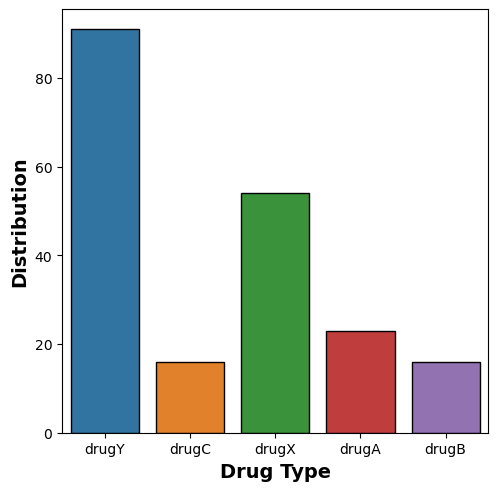

In [7]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='Drug', data=df, edgecolor='black')

plt.xlabel('Drug Type', fontsize=14, fontweight='bold')
plt.ylabel('Distribution', fontsize=14, fontweight='bold')

plt.savefig('Drug_Type_Distribution.pdf')

**Label encoding for Target**

In [8]:
LE = LabelEncoder()
LE.fit(Target)
Target2 = LE.transform(Target)
print(Target2)

[4 2 2 3 4 3 4 2 4 4 2 4 4 4 3 4 3 0 2 4 4 4 4 4 4 4 4 3 4 4 3 1 3 4 3 3 0
 3 3 3 4 1 4 3 3 3 0 2 4 4 4 3 4 4 1 2 1 4 3 4 4 0 4 3 1 4 0 3 4 4 1 4 3 4
 4 4 0 4 0 3 1 3 2 0 2 1 3 4 4 4 4 4 4 4 4 3 4 4 4 4 0 0 2 3 4 3 3 4 1 4 0
 3 3 3 3 4 3 3 0 4 4 4 4 4 1 4 4 3 4 3 4 4 3 4 4 3 1 0 1 3 0 4 1 4 0 3 3 0
 3 2 0 1 3 3 4 2 0 4 2 3 3 1 3 4 4 4 4 3 4 0 3 3 4 4 0 4 0 4 4 4 4 3 3 4 4
 4 1 0 4 4 4 0 4 2 4 2 2 3 3 3]


**Label encoding for Features**

In [9]:
# Encode Categorical Features
OHE = OneHotEncoder(handle_unknown='ignore')
CategoricalFeatures2 = OHE.fit_transform(CategoricalFeatures)
print(CategoricalFeatures2.toarray())

[[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]]


In [10]:
# Separate Non-Categorical Features
non_categorical_features = Features.drop(columns=['Sex', 'BP', 'Cholesterol']).values

In [11]:
# Combine Features
Features_encoded = np.hstack([CategoricalFeatures2.toarray(), non_categorical_features])
print(Features_encoded)

[[ 1.     0.     1.    ...  0.    23.    25.355]
 [ 0.     1.     0.    ...  0.    47.    13.093]
 [ 0.     1.     0.    ...  0.    47.    10.114]
 ...
 [ 0.     1.     0.    ...  0.    52.     9.894]
 [ 0.     1.     0.    ...  1.    23.    14.02 ]
 [ 1.     0.     0.    ...  1.    40.    11.349]]


**Splitting Dataset: Train-test split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Features_encoded, 
                                                    Target2, 
                                                    test_size=0.30,
                                                    stratify=Target2)

**Use Hyperparameter Tuning and make Logistic Regression Model**

In [13]:
# Standardize the features
scaler = StandardScaler()

# Define the model
model = LogisticRegression(max_iter=5000, solver='saga')

# Define the parameter grid
grid = {"logisticregression__C":np.logspace(-3,3,7), "logisticregression__penalty":["l2"]}

# Create a pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('logisticregression', model)
])

# Set up Grid Search
grid_search = GridSearchCV(pipeline, grid, cv=10, scoring='accuracy')

# Fit the Grid Search
grid_search.fit(X_train,y_train)

print("best parameters: ", grid_search.best_params_)

best parameters:  {'logisticregression__C': 100.0, 'logisticregression__penalty': 'l2'}


In [14]:
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

**Evaluate Model Accuracy**

In [15]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95


In [16]:
accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 1.0


**Confusion Matrix**

In [17]:
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix_Test:")
print(cm_test)

Confusion Matrix_Test:
[[ 6  0  0  0  1]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 15  1]
 [ 0  0  1  0 26]]


In [18]:
class_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

<Figure size 1000x800 with 0 Axes>

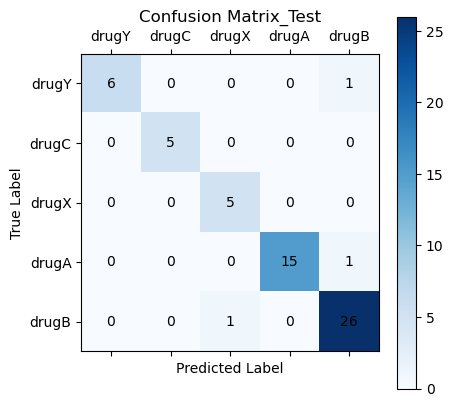

In [23]:
# Create a heatmap with matplotlib
plt.figure(figsize=(10, 8))
cax = plt.matshow(cm_test, cmap='Blues')

# Add color bar
plt.colorbar(cax)

# Add annotations
for (i, j), val in np.ndenumerate(cm_test):
    plt.text(j, i, val, ha='center', va='center', color='black', fontsize=10)

# Add labels, title and ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix_Test')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)), labels=class_labels)

plt.show()

In [21]:
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix_Train:")
print(cm_train)

Confusion Matrix_Train:
[[16  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0 38  0]
 [ 0  0  0  0 64]]


<Figure size 1000x800 with 0 Axes>

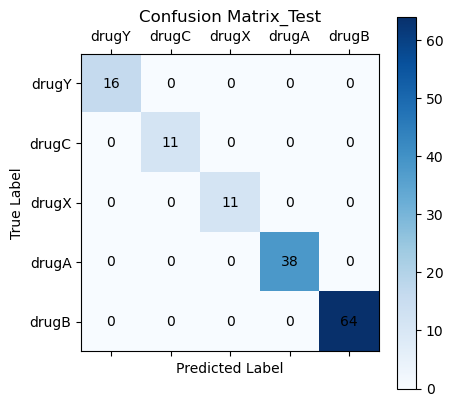

In [24]:
# Create a heatmap with matplotlib
plt.figure(figsize=(10, 8))
cax = plt.matshow(cm_train, cmap='Blues')

# Add color bar
plt.colorbar(cax)

# Add annotations
for (i, j), val in np.ndenumerate(cm_train):
    plt.text(j, i, val, ha='center', va='center', color='black', fontsize=10)

# Add labels, title and ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix_Test')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)), labels=class_labels)

plt.show()